In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv('bjk_xg.csv')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 32 non-null     object 
 1   bjk_goal             32 non-null     int64  
 2   bjk_xG               32 non-null     float64
 3   opp_goal             32 non-null     int64  
 4   opp_xG               32 non-null     float64
 5   bjk_possesion        32 non-null     float64
 6   bjk_touches_att_pen  32 non-null     int64  
 7   bjk_completed_pass   32 non-null     int64  
 8   bjk_pass_accuracy    32 non-null     float64
dtypes: float64(4), int64(4), object(1)
memory usage: 2.4+ KB


In [48]:
df['Date'] = pd.to_datetime(df['Date'])

In [49]:
df['bjk_xG_cumulative'] = df['bjk_xG'].cumsum()
df['bjk_goal_cumulative'] = df['bjk_goal'].cumsum()
df['opp_xG_cumulative'] = df['opp_xG'].cumsum()
df['opp_goal_cumulative'] = df['opp_goal'].cumsum()

### Besiktas xG flow chart

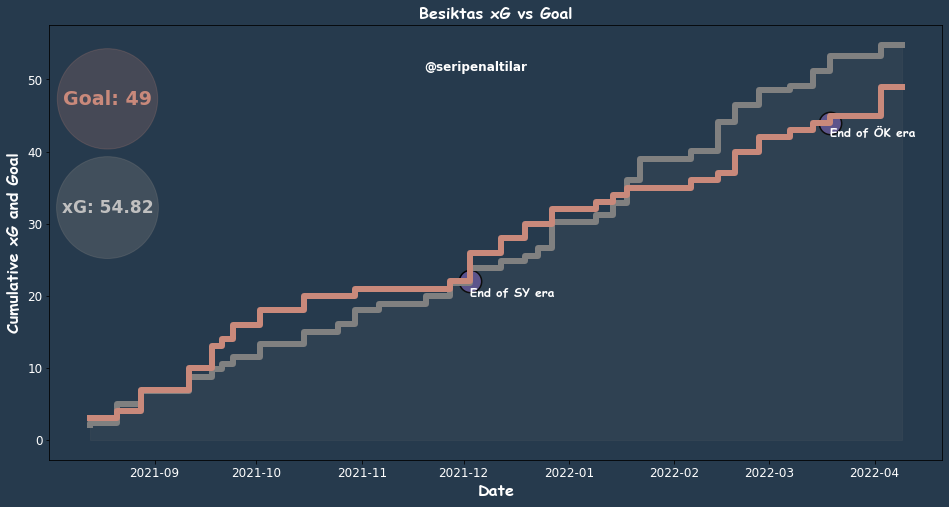

In [50]:
fig,ax = plt.subplots(figsize=(16,8))

ax.step(x=df['Date'],y=df['bjk_xG_cumulative'],c="#808080",linewidth=6)
ax.step(x=df['Date'],y=df['bjk_goal_cumulative'],c="#c9897b",linewidth=6)


ax.scatter(x=df[df['Date']=='2021-12-03']['Date'],y=df[df['Date']=='2021-12-03']['bjk_goal_cumulative'], color='#58508d', edgecolor='black',s=500,linewidths=1.5)
ax.annotate('End of SY era',(df[df['Date']=='2021-12-03']['Date'],df[df['Date']=='2021-12-03']['bjk_goal_cumulative']-2),
           color='white',weight='bold',family='Comic Sans MS',size=12)

ax.scatter(x=df[df['Date']=='2022-03-19']['Date'],y=df[df['Date']=='2022-03-19']['bjk_goal_cumulative'], color='#58508d', edgecolor='black',s=500,linewidths=1.5)

ax.annotate('End of ÖK era',(df[df['Date']=='2022-03-19']['Date'],df[df['Date']=='2022-03-19']['bjk_goal_cumulative']-2),
           color='white',weight='bold',family='Comic Sans MS',size=12)

ax.set_facecolor(color='#263a4d')
fig.patch.set_facecolor('#263a4d')

plt.fill_between(df['Date'],df['bjk_xG_cumulative'],alpha=0.1,color="#808080",step='pre')
# in fill_between y should be adjusted depending on which one is more xG or Goal

plt.text(0.065, 0.83, "Goal: {}".format(df['bjk_goal_cumulative'].max()), size=19,
         ha="center", va="center",transform=ax.transAxes,
         color="#c9897b",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#c9897b',alpha=0.20)
         )

plt.text(0.065, 0.58, "xG: {}".format(round(df['bjk_xG_cumulative'].max(),2)), size=17,
         ha="center", va="center",transform=ax.transAxes,
         color="#C0C0C0",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#808080',alpha=0.30)
         )

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

plt.xlabel('Date',fontdict=font)
plt.ylabel('Cumulative xG and Goal', fontdict=font)
plt.xticks(fontsize=12,c='white')
plt.yticks(fontsize=12,c='white')
plt.title('Besiktas xG vs Goal',fontdict=font)
plt.grid(False)
plt.figtext(0.45,0.8,'@seripenaltilar',color='white',fontweight="bold",fontsize=12)

plt.show()

### Opponents of BJK xG flow chart

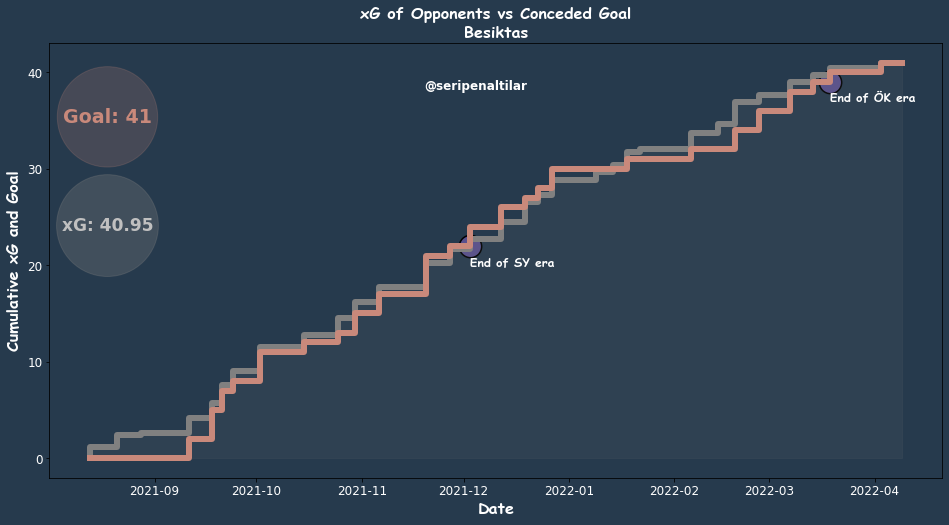

In [51]:
fig,ax = plt.subplots(figsize=(16,8))

ax.step(x=df['Date'],y=df['opp_xG_cumulative'],c="#808080",linewidth=6)
ax.step(x=df['Date'],y=df['opp_goal_cumulative'],c="#c9897b",linewidth=6)

ax.scatter(x=df[df['Date']=='2021-12-03']['Date'],y=df[df['Date']=='2021-12-03']['opp_goal_cumulative'], color='#58508d', edgecolor='black',s=500,linewidths=1.5)
ax.annotate('End of SY era',(df[df['Date']=='2021-12-03']['Date'],df[df['Date']=='2021-12-03']['opp_goal_cumulative']-2),
           color='white',weight='bold',family='Comic Sans MS',size=12)

ax.scatter(x=df[df['Date']=='2022-03-19']['Date'],y=df[df['Date']=='2022-03-19']['opp_goal_cumulative'], color='#58508d', edgecolor='black',s=500,linewidths=1.5)

ax.annotate('End of ÖK era',(df[df['Date']=='2022-03-19']['Date'],df[df['Date']=='2022-03-19']['opp_goal_cumulative']-2),
           color='white',weight='bold',family='Comic Sans MS',size=12)

ax.set_facecolor(color='#263a4d')
fig.patch.set_facecolor('#263a4d')

plt.fill_between(df['Date'],df['opp_xG_cumulative'],alpha=0.1,color="#808080",step='pre')
# in fill_between y should be adjusted depending on which one is more xG or Goal

plt.text(0.065, 0.83, "Goal: {}".format(df['opp_goal_cumulative'].max()), size=19,
         ha="center", va="center",transform=ax.transAxes,
         color="#c9897b",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#c9897b',alpha=0.20)
         )

plt.text(0.065, 0.58, "xG: {}".format(round(df['opp_xG_cumulative'].max(),2)), size=17,
         ha="center", va="center",transform=ax.transAxes,
         color="#C0C0C0",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#808080',alpha=0.30)
         )

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

plt.xlabel('Date',fontdict=font)
plt.ylabel('Cumulative xG and Goal', fontdict=font)
plt.xticks(fontsize=12,c='white')
plt.yticks(fontsize=12,c='white')
plt.title('xG of Opponents vs Conceded Goal\nBesiktas',fontdict=font)
plt.grid(False)
plt.figtext(0.45,0.8,'@seripenaltilar',color='white',fontweight="bold",fontsize=12)

plt.show()

### Rolling Mean xG for & Against

In [52]:
# adding rolling mean and converting first 4 matches cumulative average
df['bjk_xG_roll_mean'] = df['bjk_xG'].rolling(window=5,min_periods=1).mean()
df['opp_xG_roll_mean'] = df['opp_xG'].rolling(window=5,min_periods=1).mean()

In [53]:
# creating new df and renaming columns
roll = df[['Date','bjk_xG_roll_mean','opp_xG_roll_mean']]
roll.rename(columns={'bjk_xG_roll_mean':'bjk','opp_xG_roll_mean':'opp'},inplace=True)

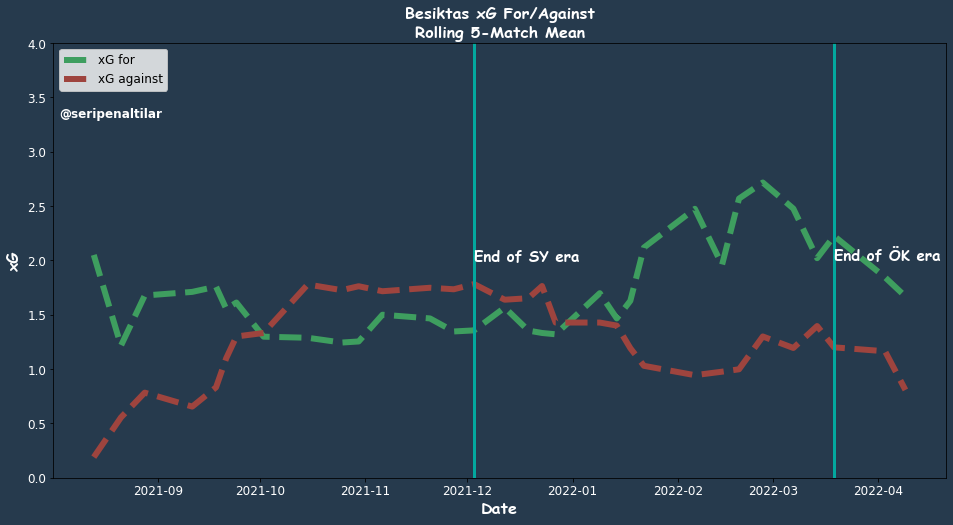

In [54]:
# rolling mean line plot

fig,ax = plt.subplots(figsize=(16,8))

fig.patch.set_facecolor('#263a4d')
ax.set_facecolor(color='#263a4d')

plt.plot(roll['Date'],roll['bjk'],ls='dashed',lw=6,c='#3e9e5f',label='xG for')
plt.plot(roll['Date'],roll['opp'],ls='dashed',lw=6,c='#9e443e',label='xG against')

#adding vertical line for annotation
plt.axvline(x=roll[roll['Date']=='2021-12-03']['Date'], ymin=0, ymax=4,lw=3,c='#03a89e')
plt.annotate('End of SY era',(roll[roll['Date']=='2021-12-03']['Date'],2),
           color='white',weight='bold',family='Comic Sans MS',size=15)

plt.axvline(x=roll[roll['Date']=='2022-03-19']['Date'], ymin=0, ymax=4,lw=3,c='#03a89e')
plt.annotate('End of ÖK era',(roll[roll['Date']=='2022-03-19']['Date'],2),
           color='white',weight='bold',family='Comic Sans MS',size=15)

plt.ylim(0,4)

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

plt.xlabel('Date',fontdict=font)
plt.ylabel('xG', fontdict=font)
plt.xticks(fontsize=12,c='white')
plt.yticks(fontsize=12,c='white')
plt.figtext(0.13,0.75,'@seripenaltilar',color='white',fontweight="bold",fontsize=12)
plt.legend(loc=2,prop={'size': 12})
plt.title('Besiktas xG For/Against\nRolling 5-Match Mean',fontdict=font)
plt.show()

### Focusing on xG Difference

In [55]:
df['xG_difference'] = df['bjk_xG'] - df['opp_xG']

In [56]:
# 6:win, 4:draw, 2:loose

df['result'] = np.where(df['bjk_goal']-df['opp_goal']>0,6,
                np.where(df['bjk_goal']-df['opp_goal']==0,4,2
                        ))

In [57]:
# Manager

df['manager'] = np.where(df['Date']<='2021-12-03','SY',np.where(df['Date']<='2022-03-19','ÖK','VI'))

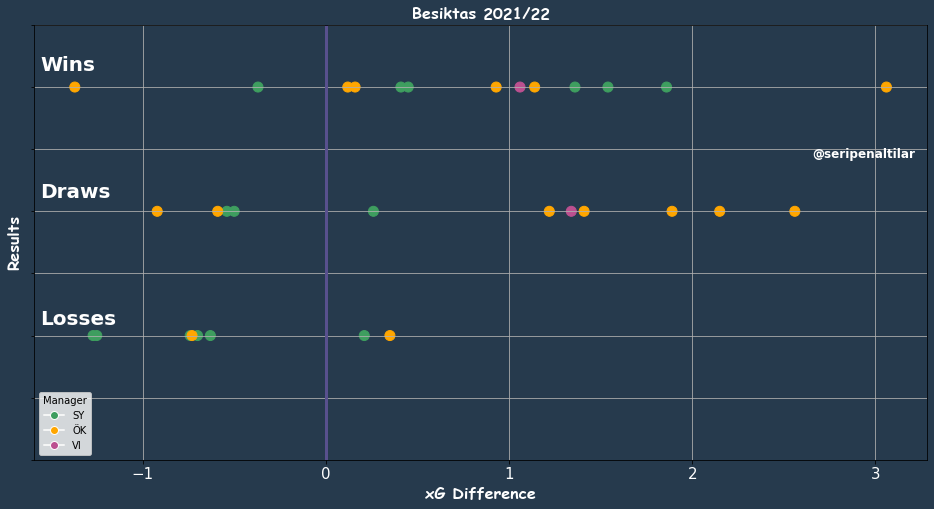

In [58]:
fig, ax = plt.subplots(figsize=(16,8))

fig.patch.set_facecolor('#263a4d')
ax.set_facecolor(color='#263a4d')

colors = {'SY':'#3e9e5f','ÖK':'#ffa600','VI':'#bc5090'}
ax.scatter(df['xG_difference'],df['result'],s=100,c=df['manager'].map(colors))
plt.yticks([x for x in range(0,8,1)])

plt.axvline(x=0, ymin=0, ymax=8,lw=3,c='#58508d')


font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

plt.xlabel('xG Difference',fontdict=font)
plt.ylabel('Results', fontdict=font)
plt.xticks(fontsize=15,c='white')

plt.figtext(0.80,0.65,'@seripenaltilar',color='white',fontweight="bold",fontsize=12)
plt.figtext(0.13,0.80,'Wins',color='white',fontweight="bold",fontsize=20)
plt.figtext(0.13,0.58,'Draws',color='white',fontweight="bold",fontsize=20)
plt.figtext(0.13,0.36,'Losses',color='white',fontweight="bold",fontsize=20)

plt.title('Besiktas 2021/22',fontdict=font)
ax.grid(True) # adding grid
ax.set_yticklabels([]) #removing y tick labels

# creting legens
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax.legend(title='Manager', handles=handles, loc='lower left')


plt.show()

### Rolling Mean Possession & Pass Accuracy

In [60]:
df['poss_roll'] = df['bjk_possesion'].rolling(window=5,min_periods=1).mean()
df['accuracy_roll'] = df['bjk_pass_accuracy'].rolling(window=5,min_periods=1).mean()

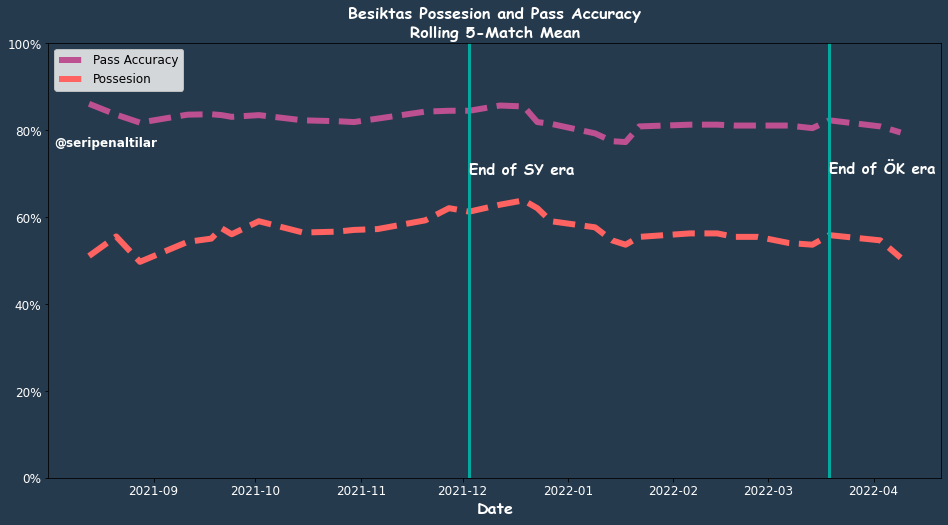

In [143]:
fig, ax = plt.subplots(figsize=(16,8))

fig.patch.set_facecolor('#263a4d')
ax.set_facecolor(color='#263a4d')

plt.plot(df['Date'],df['accuracy_roll'],ls='dashed',lw=6,c='#bc5090',label='Pass Accuracy')
plt.plot(df['Date'],df['poss_roll'],ls='dashed',lw=6,c='#ff6361',label='Possesion')

plt.axvline(x=df[df['Date']=='2021-12-03']['Date'], ymin=0, ymax=1,lw=3,c='#03a89e')
plt.annotate('End of SY era',(df[df['Date']=='2021-12-03']['Date'],0.7),
           color='white',weight='bold',family='Comic Sans MS',size=15)

plt.axvline(x=df[df['Date']=='2022-03-19']['Date'], ymin=0, ymax=1,lw=3,c='#03a89e')
plt.annotate('End of ÖK era',(df[df['Date']=='2022-03-19']['Date'],0.7),
           color='white',weight='bold',family='Comic Sans MS',size=15)

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16}

plt.xlabel('Date',fontdict=font)
plt.xticks(fontsize=12,c='white')
plt.yticks(fontsize=12,c='white')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylim(0,1)
plt.legend(loc=2,prop={'size':12})
plt.figtext(0.13,0.70,'@seripenaltilar',color='white',fontweight="bold",fontsize=12)
plt.title('Besiktas Possesion and Pass Accuracy\nRolling 5-Match Mean',fontdict=font)
plt.show()

### Scatter Plot Touches Attack Pen Area vs Possesion

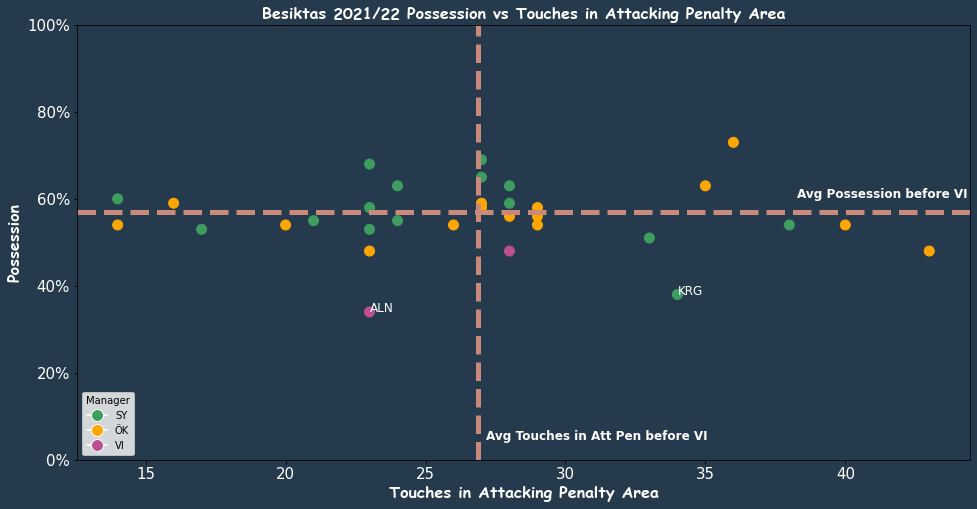

In [164]:
fig, ax = plt.subplots(figsize=(16,8))

fig.patch.set_facecolor('#263a4d')
ax.set_facecolor(color='#263a4d')

colors = {'SY':'#3e9e5f','ÖK':'#ffa600','VI':'#bc5090'}
ax.scatter(df['bjk_touches_att_pen'],df['bjk_possesion'],s=100,c=df['manager'].map(colors))

plt.ylim(0,1)

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

plt.axvline(x=df[df['manager']!='VI']['bjk_touches_att_pen'].mean(), ymin=0, ymax=1,lw=5,ls='--',c='#c9897b')
plt.axhline(y=df[df['manager']!='VI']['bjk_possesion'].mean(), xmin=0, xmax=60,lw=5,ls='--',c='#c9897b')


plt.xlabel('Touches in Attacking Penalty Area',fontdict=font)
plt.ylabel('Possession', fontdict=font)
plt.xticks(fontsize=15,c='white')
plt.yticks(fontsize=15,c='white')

plt.text(df[df['Date']=='2022-04-09']['bjk_touches_att_pen'],df[df['Date']=='2022-04-09']['bjk_possesion'],"ALN", color='white',size=12)
plt.text(df[df['Date']=='2021-08-28']['bjk_touches_att_pen'],df[df['Date']=='2021-08-28']['bjk_possesion'],"KRG", color='white',size=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))


# creting legends
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=12) for k, v in colors.items()]
ax.legend(title='Manager', handles=handles, loc='lower left')
#plt.figtext(0.80,0.80,'@seripenaltilar',color='white',fontweight="bold",fontsize=12)
plt.figtext(0.75,0.58,'Avg Possession before VI',color='white',fontweight="bold",fontsize=12)
plt.figtext(0.48,0.16,'Avg Touches in Att Pen before VI',color='white',fontweight="bold",fontsize=12)
plt.title('Besiktas 2021/22 Possession vs Touches in Attacking Penalty Area',fontdict=font)
plt.show()